**# Regulization**

**Problem of overfitting:** The model perform well on the training data  but poorly on the testing data

**solution:** Regulization

Regulization is a method used to prevent a machine learning model from overfitting by adding a penalty to the learning process of the model


In machine learning

packing : the model is learning by adjusting its coffiecients(weights)

overpacking : if the coffiecient are too large , the model will overfit


fine (penalty ): the penalty discourages or reduce the large coffiencts and forcing the model to  pack light or make the large coffiecient into smaller

without penality: the model will only focus on favorite items or important features


with penalty : the model add a penalty for large coffiecients , balancing between good prediction and simplicity


**L1 regulization(Lasso regression)** : applies a penalty to the absolute values of the coffiecients

if the features has large weight(coffiecient) then penality increase the loss(mse)
the model is forced to reduce the large cofficient make it to exaclty zero
we will remove those irrelevent features


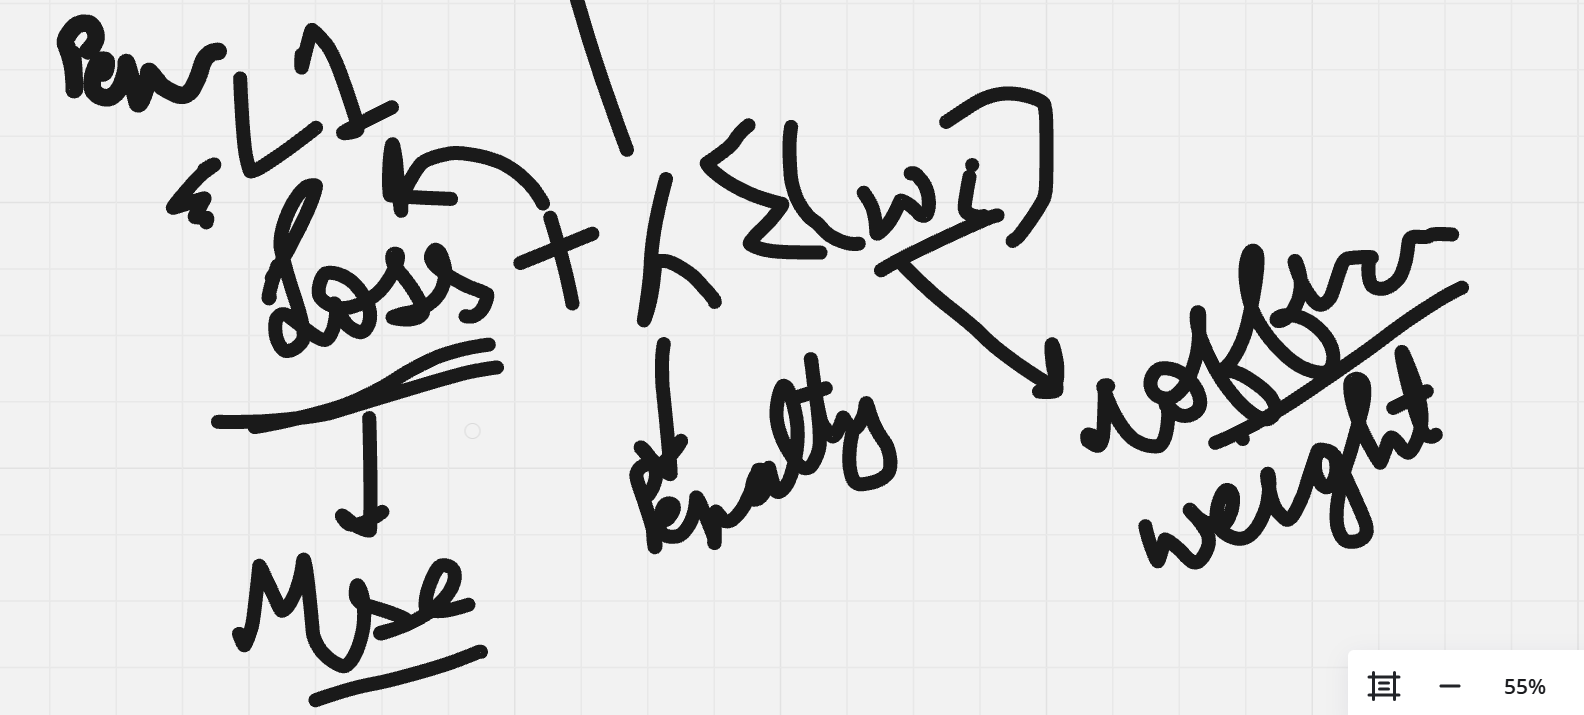




**# L2 regulization(Ridge regression)** : to prevent from the overfitting by adding a penalty term to loss function


unlike L1 reguliaztion , which can set the cofficient value to exactly zero  L2 regulization , no features is going to remove . just we are reducing the size of the cofficient which ensures that each features contribute equally to the prediction


l2  regularization keeps all features but reduce their impact to maintain the balance weights

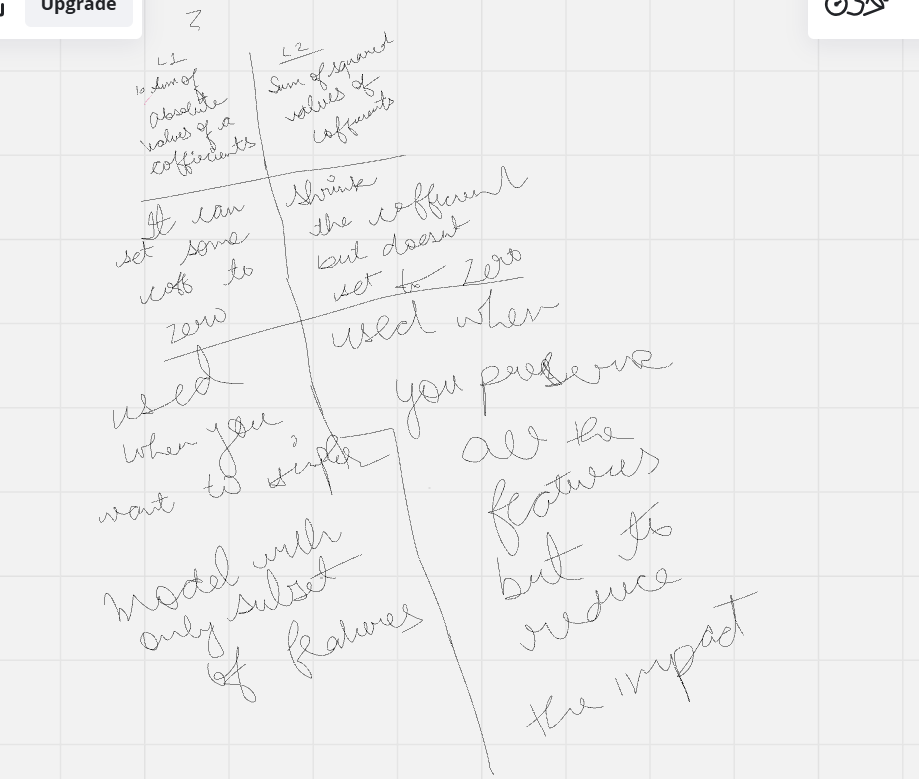

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Quote-Equity-HDFC-EQ-01-08-2018-to-30-07-2020.csv',skipinitialspace= True)

In [ ]:
df.head()

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,29-Jul-2020,EQ,"1,885.00","1,918.50","1,867.20","1,897.35","1,879.65","1,877.30","1,890.21","2,499.90","1,473.45",7413828,"14,013,720,596.85",202540
1,28-Jul-2020,EQ,"1,859.35","1,907.00","1,844.50","1,850.75","1,892.00","1,897.35","1,876.95","2,499.90","1,473.45",4346193,"8,157,568,543.65",175005
2,27-Jul-2020,EQ,"1,841.30","1,861.95","1,824.00","1,841.30","1,853.00","1,850.75","1,842.36","2,499.90","1,473.45",3724639,"6,862,134,768.10",166745
3,24-Jul-2020,EQ,"1,854.00","1,857.80","1,817.00","1,875.80","1,841.00","1,841.30","1,834.05","2,499.90","1,473.45",3309356,"6,069,531,974.80",148129
4,23-Jul-2020,EQ,"1,881.05","1,910.00","1,871.60","1,881.05","1,872.25","1,875.80","1,891.88","2,499.90","1,473.45",3647242,"6,900,158,053.60",121783


In [ ]:
df.dtypes

,0
Date,object
series,object
OPEN,object
HIGH,object
LOW,object
PREV. CLOSE,object
ltp,object
close,object
vwap,object
52W H,object


In [ ]:
df.columns

Index(['Date ', 'series ', 'OPEN ', 'HIGH ', 'LOW ', 'PREV. CLOSE ', 'ltp ',
       'close ', 'vwap ', '52W H ', '52W L ', 'VOLUME ', 'VALUE ',
       'No of trades '],
      dtype='object')

regex = True  .... using this special search pattern to find and replace the things in text in one go...

In [ ]:
columns_to_covert = ['OPEN ', 'HIGH ', 'LOW ', 'PREV. CLOSE ', 'ltp ',
       'close ', 'vwap ', '52W H ', '52W L ', 'VOLUME ', 'VALUE ',
       'No of trades ']

df[columns_to_covert] = df[columns_to_covert].replace(',','',regex = True).astype("float64")

In [ ]:
df

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,29-Jul-2020,EQ,1885.00,1918.50,1867.20,1897.35,1879.65,1877.30,1890.21,2499.90,1473.45,7413828.0,1.401372e+10,202540.0
1,28-Jul-2020,EQ,1859.35,1907.00,1844.50,1850.75,1892.00,1897.35,1876.95,2499.90,1473.45,4346193.0,8.157569e+09,175005.0
2,27-Jul-2020,EQ,1841.30,1861.95,1824.00,1841.30,1853.00,1850.75,1842.36,2499.90,1473.45,3724639.0,6.862135e+09,166745.0
3,24-Jul-2020,EQ,1854.00,1857.80,1817.00,1875.80,1841.00,1841.30,1834.05,2499.90,1473.45,3309356.0,6.069532e+09,148129.0
4,23-Jul-2020,EQ,1881.05,1910.00,1871.60,1881.05,1872.25,1875.80,1891.88,2499.90,1473.45,3647242.0,6.900158e+09,121783.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,07-Aug-2018,EQ,1982.00,1992.90,1968.55,1979.30,1976.40,1978.60,1981.20,2052.95,1638.00,1680478.0,3.329357e+09,95314.0
485,06-Aug-2018,EQ,1999.00,1999.00,1965.05,1977.50,1976.00,1979.30,1979.47,2052.95,1638.00,2219237.0,4.392921e+09,118161.0
486,03-Aug-2018,EQ,1945.00,1980.00,1941.00,1931.95,1980.00,1977.50,1968.28,2052.95,1638.00,2346246.0,4.618064e+09,118473.0
487,02-Aug-2018,EQ,1962.00,1966.50,1927.35,1970.15,1932.00,1931.95,1942.00,2052.95,1638.00,2595747.0,5.040938e+09,142909.0


In [ ]:
df.dtypes

,0
Date,object
series,object
OPEN,float64
HIGH,float64
LOW,float64
PREV. CLOSE,float64
ltp,float64
close,float64
vwap,float64
52W H,float64


the value x will format each value into two decimal places

In [ ]:
df['VALUE '] = df['VALUE '].apply(lambda x :f'{x:.2f}')
print(df['VALUE '].head())

0    14013720596.85
1     8157568543.65
2     6862134768.10
3     6069531974.80
4     6900158053.60
Name: VALUE , dtype: object


In [ ]:
df

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,29-Jul-2020,EQ,1885.00,1918.50,1867.20,1897.35,1879.65,1877.30,1890.21,2499.90,1473.45,7413828.0,14013720596.85,202540.0
1,28-Jul-2020,EQ,1859.35,1907.00,1844.50,1850.75,1892.00,1897.35,1876.95,2499.90,1473.45,4346193.0,8157568543.65,175005.0
2,27-Jul-2020,EQ,1841.30,1861.95,1824.00,1841.30,1853.00,1850.75,1842.36,2499.90,1473.45,3724639.0,6862134768.10,166745.0
3,24-Jul-2020,EQ,1854.00,1857.80,1817.00,1875.80,1841.00,1841.30,1834.05,2499.90,1473.45,3309356.0,6069531974.80,148129.0
4,23-Jul-2020,EQ,1881.05,1910.00,1871.60,1881.05,1872.25,1875.80,1891.88,2499.90,1473.45,3647242.0,6900158053.60,121783.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,07-Aug-2018,EQ,1982.00,1992.90,1968.55,1979.30,1976.40,1978.60,1981.20,2052.95,1638.00,1680478.0,3329357222.55,95314.0
485,06-Aug-2018,EQ,1999.00,1999.00,1965.05,1977.50,1976.00,1979.30,1979.47,2052.95,1638.00,2219237.0,4392921183.00,118161.0
486,03-Aug-2018,EQ,1945.00,1980.00,1941.00,1931.95,1980.00,1977.50,1968.28,2052.95,1638.00,2346246.0,4618064279.95,118473.0
487,02-Aug-2018,EQ,1962.00,1966.50,1927.35,1970.15,1932.00,1931.95,1942.00,2052.95,1638.00,2595747.0,5040937787.10,142909.0


In [ ]:
df.isnull().sum()

,0
Date,0
series,0
OPEN,0
HIGH,0
LOW,0
PREV. CLOSE,0
ltp,0
close,0
vwap,0
52W H,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(489, 14)

In [ ]:
df.head()

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,29-Jul-2020,EQ,1885.00,1918.50,1867.2,1897.35,1879.65,1877.30,1890.21,2499.9,1473.45,7413828.0,14013720596.85,202540.0
1,28-Jul-2020,EQ,1859.35,1907.00,1844.5,1850.75,1892.00,1897.35,1876.95,2499.9,1473.45,4346193.0,8157568543.65,175005.0
2,27-Jul-2020,EQ,1841.30,1861.95,1824.0,1841.30,1853.00,1850.75,1842.36,2499.9,1473.45,3724639.0,6862134768.10,166745.0
3,24-Jul-2020,EQ,1854.00,1857.80,1817.0,1875.80,1841.00,1841.30,1834.05,2499.9,1473.45,3309356.0,6069531974.80,148129.0
4,23-Jul-2020,EQ,1881.05,1910.00,1871.6,1881.05,1872.25,1875.80,1891.88,2499.9,1473.45,3647242.0,6900158053.60,121783.0


In [ ]:
df = df.drop(columns=['Date '])

In [ ]:
df

,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,EQ,1885.00,1918.50,1867.20,1897.35,1879.65,1877.30,1890.21,2499.90,1473.45,7413828.0,14013720596.85,202540.0
1,EQ,1859.35,1907.00,1844.50,1850.75,1892.00,1897.35,1876.95,2499.90,1473.45,4346193.0,8157568543.65,175005.0
2,EQ,1841.30,1861.95,1824.00,1841.30,1853.00,1850.75,1842.36,2499.90,1473.45,3724639.0,6862134768.10,166745.0
3,EQ,1854.00,1857.80,1817.00,1875.80,1841.00,1841.30,1834.05,2499.90,1473.45,3309356.0,6069531974.80,148129.0
4,EQ,1881.05,1910.00,1871.60,1881.05,1872.25,1875.80,1891.88,2499.90,1473.45,3647242.0,6900158053.60,121783.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,EQ,1982.00,1992.90,1968.55,1979.30,1976.40,1978.60,1981.20,2052.95,1638.00,1680478.0,3329357222.55,95314.0
485,EQ,1999.00,1999.00,1965.05,1977.50,1976.00,1979.30,1979.47,2052.95,1638.00,2219237.0,4392921183.00,118161.0
486,EQ,1945.00,1980.00,1941.00,1931.95,1980.00,1977.50,1968.28,2052.95,1638.00,2346246.0,4618064279.95,118473.0
487,EQ,1962.00,1966.50,1927.35,1970.15,1932.00,1931.95,1942.00,2052.95,1638.00,2595747.0,5040937787.10,142909.0


In [ ]:
df['series '].unique()

array(['EQ'], dtype=object)

In [ ]:
df = df.drop(columns =['series '])
df

,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,1885.00,1918.50,1867.20,1897.35,1879.65,1877.30,1890.21,2499.90,1473.45,7413828.0,14013720596.85,202540.0
1,1859.35,1907.00,1844.50,1850.75,1892.00,1897.35,1876.95,2499.90,1473.45,4346193.0,8157568543.65,175005.0
2,1841.30,1861.95,1824.00,1841.30,1853.00,1850.75,1842.36,2499.90,1473.45,3724639.0,6862134768.10,166745.0
3,1854.00,1857.80,1817.00,1875.80,1841.00,1841.30,1834.05,2499.90,1473.45,3309356.0,6069531974.80,148129.0
4,1881.05,1910.00,1871.60,1881.05,1872.25,1875.80,1891.88,2499.90,1473.45,3647242.0,6900158053.60,121783.0
...,...,...,...,...,...,...,...,...,...,...,...,...
484,1982.00,1992.90,1968.55,1979.30,1976.40,1978.60,1981.20,2052.95,1638.00,1680478.0,3329357222.55,95314.0
485,1999.00,1999.00,1965.05,1977.50,1976.00,1979.30,1979.47,2052.95,1638.00,2219237.0,4392921183.00,118161.0
486,1945.00,1980.00,1941.00,1931.95,1980.00,1977.50,1968.28,2052.95,1638.00,2346246.0,4618064279.95,118473.0
487,1962.00,1966.50,1927.35,1970.15,1932.00,1931.95,1942.00,2052.95,1638.00,2595747.0,5040937787.10,142909.0


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


In [ ]:
df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

In [ ]:
df

,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,-0.546792,-0.522181,-0.492030,-0.480863,-0.561246,-0.567977,-0.517201,1.200208,-1.635947,1.350037,1.402549,0.663695
1,-0.660417,-0.574495,-0.590791,-0.686228,-0.506654,-0.479646,-0.576135,1.200208,-1.635947,0.107215,0.047890,0.249401
2,-0.740375,-0.779430,-0.679980,-0.727874,-0.679049,-0.684944,-0.729872,1.200208,-1.635947,-0.144602,-0.251772,0.125120
3,-0.684116,-0.798308,-0.710435,-0.575833,-0.732094,-0.726577,-0.766806,1.200208,-1.635947,-0.312850,-0.435119,-0.154977
4,-0.564290,-0.560848,-0.472887,-0.552697,-0.593957,-0.574586,-0.509779,1.200208,-1.635947,-0.175959,-0.242977,-0.551381
...,...,...,...,...,...,...,...,...,...,...,...,...
484,-0.117102,-0.183731,-0.051088,-0.119710,-0.133574,-0.121696,-0.112793,-1.156217,-0.068429,-0.972774,-1.068983,-0.949636
485,-0.041795,-0.155982,-0.066316,-0.127643,-0.135342,-0.118612,-0.120482,-1.156217,-0.068429,-0.754501,-0.822957,-0.605878
486,-0.281005,-0.242414,-0.170950,-0.328381,-0.117661,-0.126542,-0.170216,-1.156217,-0.068429,-0.703044,-0.770876,-0.601184
487,-0.205698,-0.303826,-0.230336,-0.160034,-0.329839,-0.327215,-0.287019,-1.156217,-0.068429,-0.601962,-0.673056,-0.233518


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso , Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error  , r2_score

In [ ]:
df.columns

Index(['OPEN ', 'HIGH ', 'LOW ', 'PREV. CLOSE ', 'ltp ', 'close ', 'vwap ',
       '52W H ', '52W L ', 'VOLUME ', 'VALUE ', 'No of trades '],
      dtype='object')

In [ ]:
x = df.drop(columns = ['No of trades '])

In [ ]:
x

,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE
0,-0.546792,-0.522181,-0.492030,-0.480863,-0.561246,-0.567977,-0.517201,1.200208,-1.635947,1.350037,1.402549
1,-0.660417,-0.574495,-0.590791,-0.686228,-0.506654,-0.479646,-0.576135,1.200208,-1.635947,0.107215,0.047890
2,-0.740375,-0.779430,-0.679980,-0.727874,-0.679049,-0.684944,-0.729872,1.200208,-1.635947,-0.144602,-0.251772
3,-0.684116,-0.798308,-0.710435,-0.575833,-0.732094,-0.726577,-0.766806,1.200208,-1.635947,-0.312850,-0.435119
4,-0.564290,-0.560848,-0.472887,-0.552697,-0.593957,-0.574586,-0.509779,1.200208,-1.635947,-0.175959,-0.242977
...,...,...,...,...,...,...,...,...,...,...,...
484,-0.117102,-0.183731,-0.051088,-0.119710,-0.133574,-0.121696,-0.112793,-1.156217,-0.068429,-0.972774,-1.068983
485,-0.041795,-0.155982,-0.066316,-0.127643,-0.135342,-0.118612,-0.120482,-1.156217,-0.068429,-0.754501,-0.822957
486,-0.281005,-0.242414,-0.170950,-0.328381,-0.117661,-0.126542,-0.170216,-1.156217,-0.068429,-0.703044,-0.770876
487,-0.205698,-0.303826,-0.230336,-0.160034,-0.329839,-0.327215,-0.287019,-1.156217,-0.068429,-0.601962,-0.673056


In [ ]:
y = df['No of trades ']

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x,y ,train_size= 0.80 , random_state = 0)

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(x_train , y_train)

LinearRegression()

In [ ]:
ypred = lr.predict(x_test)

In [ ]:
r2score = r2_score(y_test , ypred)
r2score

0.7585678928053705

In [ ]:
mse_linear = mean_squared_error(y_test , ypred)
mse_linear

0.18278589407765208

alpha determines the amount of penality added to the loss function to avoid overfitting
a higher value of alpha is strong regulization which forces the model coffiecients to be smaller .... this can improve your model performance but it may also lead to underfitting problem


a lower value of alpha result as a week regulization ... it means model  will fit the training data more closely  but it may also lead to overfitt
alpha = 0.1 is often as starting point that create a good balance between your regulization and model flexibity

 make sure it will not too high(underfitting and not too low(overfitting)

In [ ]:
lasso = Lasso(alpha = 0.1)
lasso.fit(x_train , y_train)

Lasso(alpha=0.1)

In [ ]:
y_pred_lasso = lasso.predict(x_test)

In [ ]:
mse_lasso = mean_squared_error(y_test , y_pred_lasso)
print(f"lasso regression mse  :{mse_lasso}")

lasso regression mse  :0.18585544869329615


In [ ]:
r2score = r2_score(y_test , y_pred_lasso)
r2score

0.7545134823556827

In [ ]:
ridge = Ridge(alpha =0.1)
ridge.fit(x_train , y_train)

Ridge(alpha=0.1)

In [ ]:
y_pred_ridge = ridge.predict(x_test)


In [ ]:
mse_ridge = mean_squared_error(y_test , y_pred_ridge)
print(f"ridge regression mse  :{mse_ridge}")

ridge regression mse  :0.17641059432929707


In [ ]:
r2score = r2_score(y_test , y_pred_ridge)
r2score

0.7669886851209353

In [ ]:
print("Linear regression coffiecient ",lr.coef_)
print("ridge regression cofffiecient", ridge.coef_)
print("lasso regression cofficient", lasso.coef_)

Linear regression coffiecient  [ 0.12312904  1.86397516  0.67186213  0.09457511  1.68452511 -1.8272726
 -2.61323985 -0.02748406 -0.02836607  1.04911614 -0.2388813 ]
ridge regression cofffiecient [ 0.30200895  1.29413132  0.10102022  0.11138961  0.69682411 -0.86748579
 -1.63136201 -0.02321494 -0.03144818  1.09241807 -0.27767893]
lasso regression cofficient [-0.         -0.         -0.0107143  -0.         -0.         -0.
 -0.          0.         -0.          0.77073609  0.        ]
